# Predviđanje trajanja hospitalizacije pacijenata

Vizuelno i analiticko objasnjenje koraka prilikom analize podataka. Glavni deo projekta implementiran je u Python fajlovima.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))
from src.eda import *
from src.preprocessing import *
from main import load_data
from src.clustering import *
from src.models import *
from src.evaluation import *
from src.utils import are_assumptions_satisfied


## 1. Učitavanje podataka  
Skup podataka sadrži 100 000 instanci, gde svaka predstavlja jedan bolnički prijem pacijenta.

In [2]:
df = load_data("../data/LengthOfStay.csv")
#df.head(5).T

## 2. Eksplorativna analiza podataka

### 2.1 Analiza ciljne promenljive `lengthofstay`

Prikazana je distribucija ciljne promenljive kroz histogram i boxplot.

count    100000.00000
mean          4.00103
std           2.36031
min           1.00000
25%           2.00000
50%           4.00000
75%           6.00000
max          17.00000
Name: lengthofstay, dtype: float64


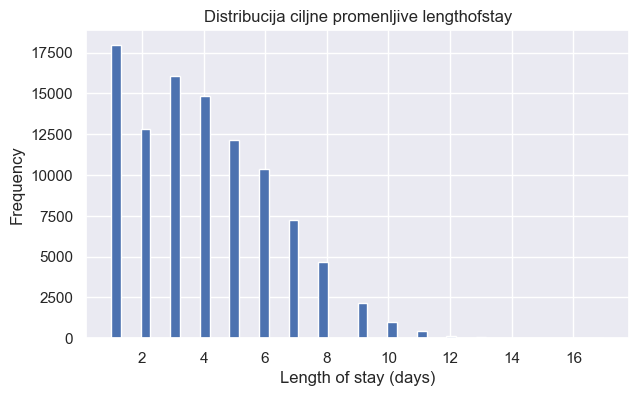

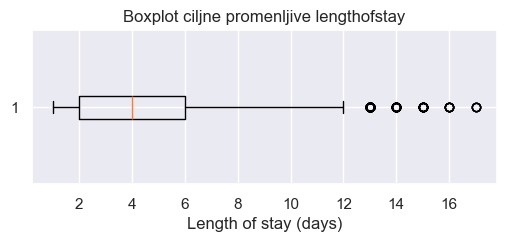

In [3]:
print(basic_stats(df['lengthofstay']))
plot_target_distribution(df['lengthofstay'])
plot_target_outliers(df['lengthofstay'])

Srednja vrednost boravka iznosi **4 dana**, a distribucija pokazuje izraženu asimetriju udesno (*right-skew*). Većina pacijenata boravi kraće vreme (1–6 dana), dok vrednosti iznad 12 dana predstavljaju ekstremne vrednosti. Ovi outlieri neće biti uklanjani jer predstavljaju realne slučajeve težih pacijenata.

### 2.2 Provera nedostajućih vrednosti

Pre pretprocesiranja, proverava se prisustvo nedostajućih vrednosti u skupu podataka.

In [4]:
missing_values(df)

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

## 3. Pretprocesiranje podataka

Uklanjaju se neinformativne kolone (`eid`, `vdate`, `discharged`), zatim se kategoričke promenljive (`rcount`, `gender`, `facid`) kodiraju metodom *one-hot encoding*, a logičke vrednosti (`True`/`False`) konvertuju u numeričke (1/0).

In [5]:
df = drop_non_informative_columns(df)
df = encode_categorical_features(df)
df = encode_boolean_features(df)

df.head().T

,0,1,2,3,4
dialysisrenalendstage,0.000000,0.000000,0.000000,0.000000,0.000000
asthma,0.000000,0.000000,0.000000,0.000000,0.000000
irondef,0.000000,0.000000,0.000000,0.000000,0.000000
pneum,0.000000,0.000000,0.000000,0.000000,1.000000
substancedependence,0.000000,0.000000,0.000000,0.000000,0.000000
psychologicaldisordermajor,0.000000,0.000000,0.000000,0.000000,1.000000
depress,0.000000,0.000000,0.000000,0.000000,0.000000
psychother,0.000000,0.000000,0.000000,0.000000,0.000000
fibrosisandother,0.000000,0.000000,0.000000,0.000000,0.000000
malnutrition,0.000000,0.000000,0.000000,0.000000,0.000000


## 4. Analiza odnosa između promenljivih

### 4.1 Korelacija sa ciljnom promenljivom

Ispituje se linearna korelacija između svih numeričkih promenljivih i ciljne promenljive `lengthofstay`.

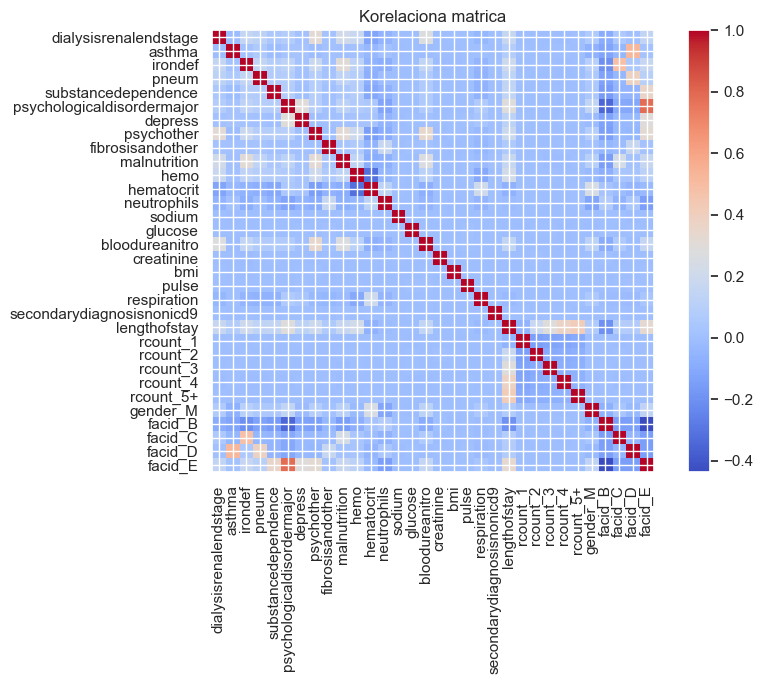

In [6]:
correlation_with_target(df)
plot_correlation_heatmap(df)

Vecina promenljivih ne pokazuje jaku linearnu vezu sa ciljnom promenljivom. Sto je ocekivano za medicinske podatke, trajanje hospitalizacije zavisi od kombinacije vise faktora i njihovih medjusobnih interakcija, a ne od pojedinacnih atributa. <br>Promenljive vezane za broj prethodnih prijema (`rcount`) pokazuju izraženiju pozitivnu korelaciju sa `lengthofstay`.<br>Dijagnostičke binarne promenljive međusobno imaju slabu korelaciju, što ukazuje na odsustvo multikolinearnosti. Vitalni parametri (`pulse`, `respiration`, `bmi` itd.) pokazuju slabu linearnu korelaciju sa ciljnom promenljivom.

### 4.2 Uticaj binarnih faktora na trajanje hospitalizacije

Ispituje se kako prisustvo određenih dijagnoza i stanja utiče na dužinu boravka. Za svaki binarni faktor računa se razlika medijane `lengthofstay` između pacijenata koji imaju (1) i nemaju (0) određeno stanje.

                       feature  median_0  median_1  diff_1_minus_0     n0  \
9             fibrosisandother       4.0       6.0             2.0  99521   
5        dialysisrenalendstage       4.0       6.0             2.0  96358   
6   psychologicaldisordermajor       3.0       5.0             2.0  76096   
7                   psychother       4.0       6.0             2.0  95061   
2                      depress       4.0       5.0             1.0  94834   
0                       asthma       4.0       5.0             1.0  96473   
1                        pneum       4.0       5.0             1.0  96055   
3                 malnutrition       4.0       5.0             1.0  95052   
4                         hemo       4.0       5.0             1.0  92000   
8                      irondef       4.0       5.0             1.0  90506   
10         substancedependence       4.0       5.0             1.0  93694   

       n1  
9     479  
5    3642  
6   23904  
7    4939  
2    5166  
0  

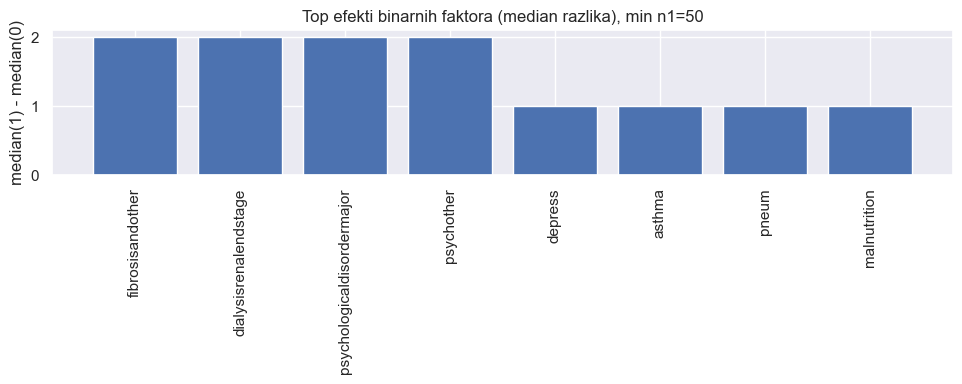

,feature,median_0,median_1,diff_1_minus_0,n0,n1
9,fibrosisandother,4.0,6.0,2.0,99521,479
5,dialysisrenalendstage,4.0,6.0,2.0,96358,3642
6,psychologicaldisordermajor,3.0,5.0,2.0,76096,23904
7,psychother,4.0,6.0,2.0,95061,4939
2,depress,4.0,5.0,1.0,94834,5166
0,asthma,4.0,5.0,1.0,96473,3527
1,pneum,4.0,5.0,1.0,96055,3945
3,malnutrition,4.0,5.0,1.0,95052,4948


In [7]:
conditions = [
    "asthma", "pneum", "depress", "malnutrition", "hemo",
    "dialysisrenalendstage", "psychologicaldisordermajor", "psychother",
    "irondef", "fibrosisandother", "substancedependence"
]

effects_df = compare_binary_features(df, binary_cols=conditions, target="lengthofstay", agg="median")
print(effects_df)

plot_top_binary_effects(df, binary_cols=conditions, target="lengthofstay", top_n=8, agg="median", min_n1=50)

Prikazani su dijagnostički faktori koji najviše utiču na produžetak boravka u bolnici. Faktori sa najvećom pozitivnom razlikom medijane ukazuju na stanja koja su povezana sa značajno dužom hospitalizacijom.

Najveći uticaj na produžetak hospitalizacije imaju **fibroza** (`fibrosisandother`), **dijaliza** (`dialysisrenalendstage`), **psihološki poremećaji** (`psychologicaldisordermajor`) i **psihoterapija** (`psychother`) — pacijenti sa ovim stanjima imaju medijanu boravka **2 dana dužu** od pacijenata bez tih stanja (6 vs 4 dana). Ostala stanja poput depresije, astme, upale pluća i malnutricije pokazuju razliku od **1 dan** u medijani boravka.

### 4.3 Uticaj broja prethodnih prijema na trajanje hospitalizacije

Ispituje se kako broj prethodnih bolničkih prijema (`rcount`) utiče na dužinu trenutne hospitalizacije.

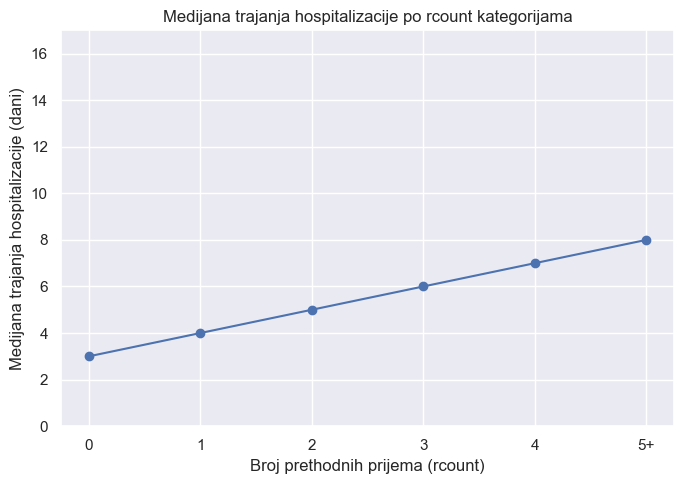

In [8]:
plot_median_los_by_rcount(df)

Grafik pokazuje **jasan rastući trend** — pacijenti bez prethodnih prijema imaju medijanu boravka od **3 dana**, dok pacijenti sa 5 ili više prethodnih prijema imaju medijanu od **8 dana**. Ovo ukazuje da je broj prethodnih hospitalizacija jedan od značajnih faktora koji utiče na dužinu boravka, verovatno jer se radi o hroničnim pacijentima sa složenim zdravstvenim stanjem.

## 5. Identifikacija grupa pacijenata (K-Means klasterizacija)

Primenjuje se K-Means algoritam nad odabranim numeričkim atributima u cilju otkrivanja potencijalnih grupa pacijenata sa sličnim zdravstvenim obrascima. Pre klasterizacije podaci se standardizuju. Za određivanje optimalnog broja klastera koristi se **Elbow metoda**.

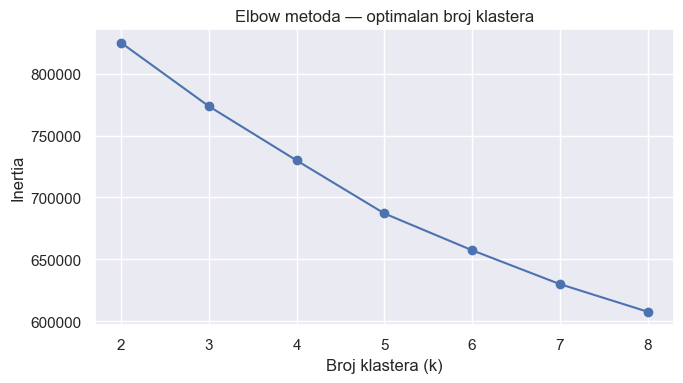

In [9]:
cluster_features = [
    'creatinine', 'bloodureanitro', 'glucose', 'sodium',
    'hematocrit', 'bmi', 'pulse', 'respiration', 'lengthofstay'
]

X = prepare_clustering_data(df, cluster_features)
X_scaled, _ = scale_features(X)

elbow_df = compute_elbow(X_scaled, k_min=2, k_max=8)
plot_elbow(elbow_df)

Elbow grafik ne pokazuje jasan "lakat", što ukazuje da podaci nemaju izrazito prirodno grupisanje.

   k  silhouette_score
0  2          0.113697
1  3          0.102585
2  4          0.067775
3  5          0.066478
4  6          0.074151
5  7          0.074239
6  8          0.072225


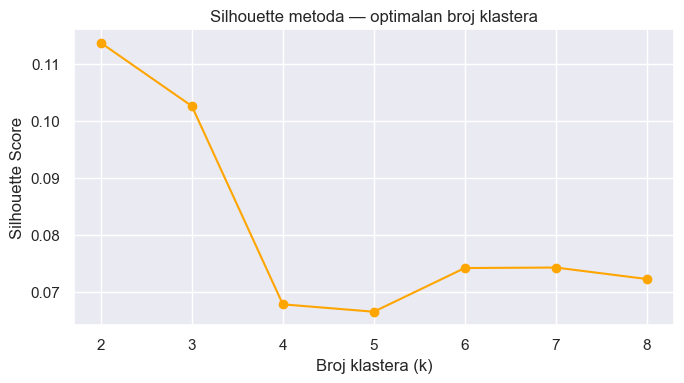

In [10]:
# uzorak od 10 000 redova
np.random.seed(42)
idx = np.random.choice(len(X_scaled), size=10000, replace=False)
X_sample = X_scaled[idx]

silhouette_df = compute_silhouette(X_sample, k_min=2, k_max=8)
print(silhouette_df)
plot_silhouette(silhouette_df)

Silhouette analiza pokazuje relativno niske vrednosti skora (maksimalno ~0.11), što potvrđuje da podaci nemaju izrazitu prirodnu klaster strukturu. <br>Matematički, k=2 daje najviši skor, ali nije dovoljno informativan.<br> Odabran je **k=3** jer omogućava podelu pacijenata na grupu sa kratkim, srednjim i dugim trajanjem hospitalizacije.

### 5.3 Primena K-Means algoritma (k=3)

Primenjuje se K-Means sa k=3 klastera. Rezultati se vizualizuju PCA metodom redukcije dimenzionalnosti na 2D prostor, a za svaki klaster prikazuje se prosečna vrednost ključnih atributa.

        creatinine              bloodureanitro               glucose         \
              mean   std  count           mean    std  count    mean    std   
cluster                                                                       
0              1.1  0.21  30180          17.39  21.89  30180  141.55  31.62   
1              1.1  0.20  20258          13.99   6.75  20258  141.66  30.64   
2              1.1  0.19  49562          12.14   4.20  49562  142.34  28.67   

                sodium  ...    bmi  pulse               respiration        \
         count    mean  ...  count   mean    std  count        mean   std   
cluster                 ...                                                 
0        30180  137.85  ...  30180  73.64  12.19  30180        6.21  0.66   
1        20258  137.90  ...  20258  73.30  12.01  20258        6.96  0.63   
2        49562  137.91  ...  49562  73.39  11.14  49562        6.48  0.29   

               lengthofstay               
         count     

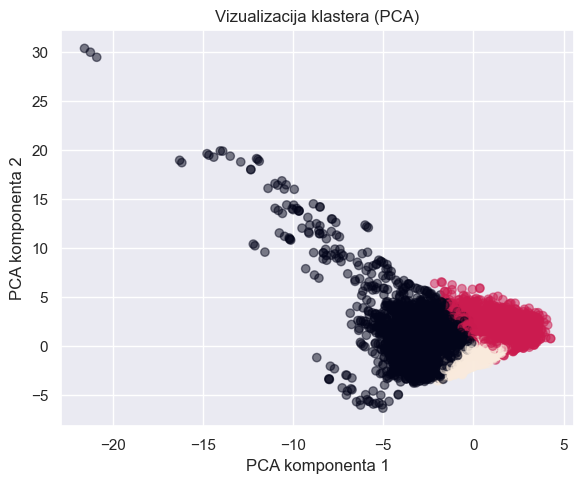

array([0.14024997, 0.12268949])

In [11]:
labels, _ = fit_kmeans(X_scaled, n_clusters=3)

summary = cluster_summary(X, labels)
print(summary)

#print(summary.xs('mean', axis=1, level=1))

plot_clusters_pca(X_scaled, labels)

K-Means algoritam sa k=3 identifikovao je tri grupe pacijenata:
- **Klaster 0** (30,180 pacijenata) — prosečno trajanje hospitalizacije **6.18 dana**, karakteriše ga visok nivo ureje u krvi (`bloodureanitro` ≈ 21.89), što ukazuje na teže zdravstveno stanje
- **Klaster 1** (20,258 pacijenata) — prosečno trajanje **5.09 dana**, srednje vrednosti laboratorijskih parametara
- **Klaster 2** (49,562 pacijenata) — prosečno trajanje **2.23 dana**, nizak nivo ureje (`bloodureanitro` ≈ 4.20), ukazuje na lakše zdravstveno stanje

PCA vizualizacija objašnjava ~26% ukupne varijanse, što ukazuje na visoku dimenzionalnost podataka. Granice između klastera nisu oštre, što je konzistentno sa niskim Silhouette skorovima i potvrđuje da podaci nemaju izrazitu prirodnu klaster strukturu.

## 6. Regresioni modeli

Primenjuju se tri regresiona modela za predikciju `lengthofstay`:
- **Linearna regresija** — provera da li je problem pogodan za linearnu regresiju
- **Random Forest** — ansambl metoda zasnovana na stablima odlučivanja
- **XGBoost** — gradijentni boosting algoritam

Podaci se dele na train (60%), validacioni (20%) i test (20%) skup.

In [12]:
features = [col for col in df.columns if col != 'lengthofstay']

x_train, x_val, x_test, y_train, y_val, y_test = split_data_train_val_test(
    df, features, target='lengthofstay'
)

print(f"Train: {x_train.shape[0]} redova")
print(f"Val:   {x_val.shape[0]} redova")
print(f"Test:  {x_test.shape[0]} redova")

Train: 60000 redova
Val:   20000 redova
Test:  20000 redova


### 6.1 Linearna regresija

Linearna regresija se koristi kao baseline model. Odgovarajućim testovima proveravaju se da li su ispunjene pretpostavke linearne regresije.

In [13]:
lr_model = train_linear_regression(x_train, y_train)

print("Linearna regresija — val skup:")
print(evaluate_model(lr_model, x_val, y_val))

print("\nReziduali (val):")
print(residual_summary(y_val, lr_model.predict(x_val)))

are_assumptions_satisfied(lr_model, x_train, y_train)

Linearna regresija — val skup:
{'MAE': 0.8680546108107509, 'RMSE': 1.1384534797324302}

Reziduali (val):
{'residual_mean': -0.019738418571525317, 'residual_median': -0.35412976339358937, 'residual_std': 1.1382823552823675, 'residual_min': -6.91423361319049, 'residual_max': 9.1658543962759}
L — Linearnost:        PASSED (p=0.0000)
I — Nezavisnost:       PASSED (DW=1.9944, autokorelacija=None)
N — Normalnost:        FAILED (p=0.0000, non-normal)
E — Jednaka varijansa: PASSED (p=0.2465, equal)
Kolinearnost:          PASSED — nema savrsene kolinearnosti

Sve pretpostavke ispunjene: NE


False

### Zaključak — Linearna regresija

| Metrika | Val skup | Test skup |
|---------|----------|-----------|
| MAE     | 0.868    | 0.874     |
| RMSE    | 1.138    | 1.144     |


### 6.2 Random Forest

Random Forest je ansambl metoda koja koristi više stabala odlučivanja treniranih nad različitim podskupovima trening skupa. Finalna predikcija se dobija kombinovanjem rezultata svih stabala, čime se postiže veća preciznost jer koristi prosečne rezultate svih stabala odlučivanja.

In [14]:
rf_model = train_random_forest(x_train, y_train)

print("Random Forest — val skup:")
print(evaluate_model(rf_model, x_val, y_val))

print("\nRandom Forest — test skup:")
print(evaluate_model(rf_model, x_test, y_test))

Random Forest — val skup:
{'MAE': 0.4056387325396282, 'RMSE': 0.6647106844957305}

Random Forest — test skup:
{'MAE': 0.41033122590777965, 'RMSE': 0.6701595183812107}


### Zaključak — Random Forest

| Metrika | Val skup | Test skup |
|---------|----------|-----------|
| MAE     | 0.406    | 0.410     |
| RMSE    | 0.665    | 0.670     |

Random Forest postiže značajno bolje rezultate u poređenju sa linearnom regresijom — MAE je smanjen sa 0.87 na 0.41 dan, a RMSE sa 1.14 na 0.67 dana. 

Rezultati na validacionom i test skupu su skoro identični, što ukazuje da model dobro generalizuje i da nema overfitovanja.

### 6.3 XGBoost

XGBoost je algoritam zasnovan na gradijentnom boostingu, gradi stabla odlučivanja sekvencijalno, gde svako novo stablo ispravlja greške prethodnog. Sadrži brojne optimizacije kao što su regularizacija i early stopping, što ga čini pogodnim za velike skupove podataka.

In [15]:
xgb_model = train_xgboost(x_train, y_train, x_val, y_val)

print("XGBoost — val skup:")
print(evaluate_model(xgb_model, x_val, y_val))

print("\nXGBoost — test skup:")
print(evaluate_model(xgb_model, x_test, y_test))

XGBoost — val skup:
{'MAE': 0.3417411744594574, 'RMSE': 0.4522808531943469}

XGBoost — test skup:
{'MAE': 0.3407216966152191, 'RMSE': 0.45131865916891684}


### Zaključak — XGBoost

| Metrika | Val skup | Test skup |
|---------|----------|-----------|
| MAE     | 0.342    | 0.341     |
| RMSE    | 0.452    | 0.451     |

XGBoost postiže najbolje rezultate od sva tri modela — MAE od 0.34 dana znači da model u proseku greši manje od 8 sati.

### 6.4 Poređenje modela

| Model               | MAE (val) | RMSE (val) | MAE (test) | RMSE (test) |
|---------------------|-----------|------------|------------|-------------|
| Linearna regresija  | 0.868     | 1.138      | 0.874      | 1.144       |
| Random Forest       | 0.406     | 0.665      | 0.410      | 0.670       |
| **XGBoost**         | **0.342** | **0.452**  | **0.341**  | **0.451**   |

XGBoost je odabran kao najbolji model. U nastavku se analizira značaj atributa za Random Forest i XGBoost modele.

### 6.5 Značaj atributa

Analiza značaja atributa prikazuje koji atributi najviše utiču na predikciju dužine hospitalizacije. Prikazuje se za Random Forest i XGBoost model.

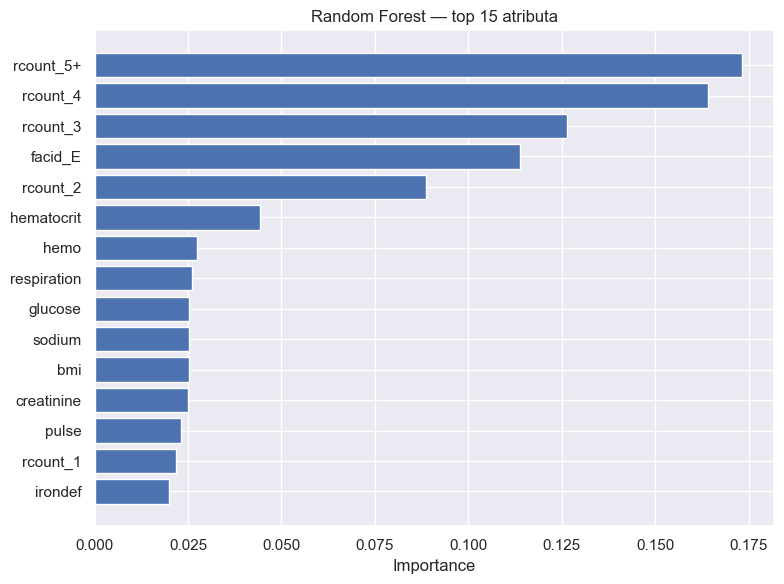

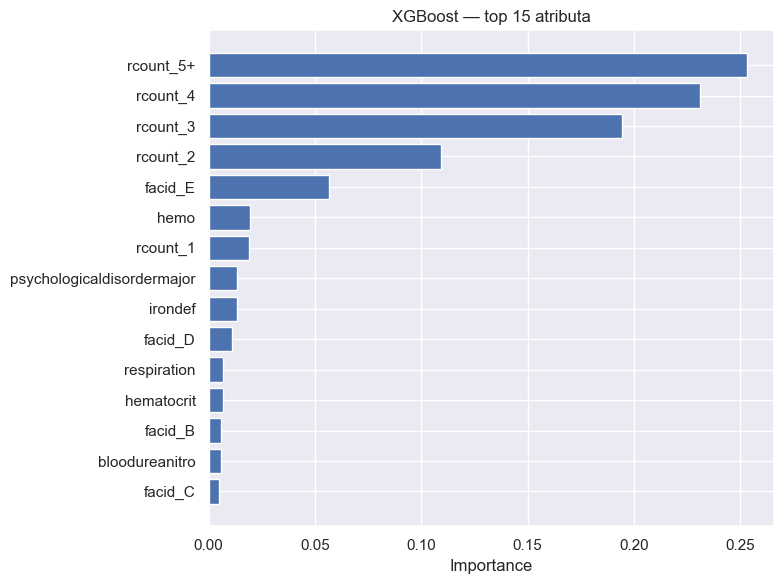

In [16]:
plot_feature_importance(rf_model, features, "Random Forest — top 15 atributa")
plot_feature_importance(xgb_model, features, "XGBoost — top 15 atributa")

### Zaključak i značaj atributa u predviđanju trajanja hospitalizacije

Oba modela se slažu da su atributi vezani za broj prethodnih hospitalizacija (`rcount`) najvažniji prediktori dužine boravka u bolnici. Pored toga, bolnica u kojoj se pacijent leči (`facid_E`) ima značajan uticaj, što može ukazivati na razlike u protokolima lečenja između ustanova.

XGBoost, prvih 5 atributa nose većinu prediktivne moći, dok Random Forest ravnomernije raspoređuje značaj na vitalne znake i laboratorijske parametre (`hematocrit`, `respiration`, `glucose`, `sodium`, `bmi`).

### 6.6 Analiza reziduala — XGBoost

Analiza reziduala najboljeg modela radi provere sistematskih grešaka.

Reziduali — XGBoost (test skup):
{'residual_mean': 0.004620184478163719, 'residual_median': 0.06452959775924683, 'residual_std': 0.4512949997945462, 'residual_min': -2.2763571739196777, 'residual_max': 3.009821891784668}


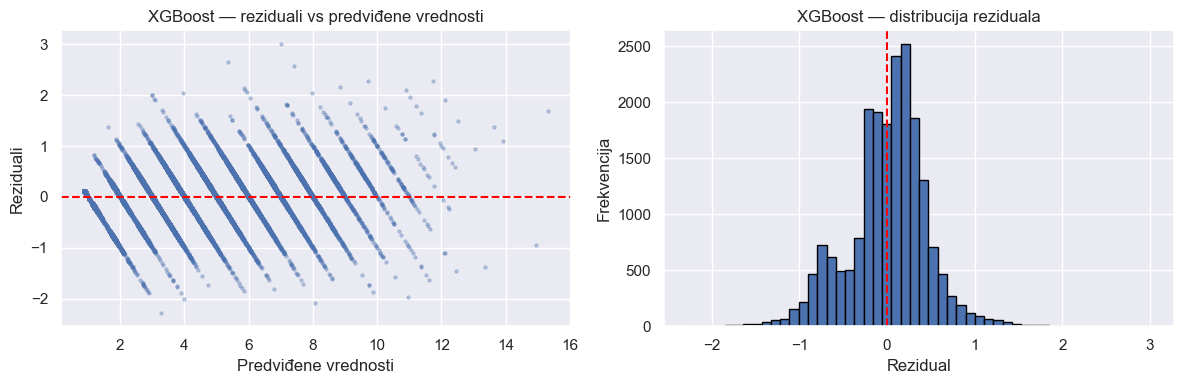

In [17]:
print("Reziduali — XGBoost (test skup):")
print(residual_summary(y_test, xgb_model.predict(x_test)))

plot_residuals(y_test, xgb_model.predict(x_test), title="XGBoost")

## 7. Regresioni upiti

Obučeni XGBoost model koristi se za procenu očekivanog broja dana hospitalizacije za pacijente sa različitim zdravstvenim i demografskim karakteristikama. Svaki upit predstavlja hipotetičkog pacijenta definisanog skupom atributa.

### Upit 1 — Mlad pacijent, prvi put hospitalizovan

Pacijent: bez prethodnih hospitalizacija, normalni vitalni znaci, bolnica A.

In [21]:
from src.queries import create_patient_query

query1 = create_patient_query(x_train, rcount=0, gender='F', facid='A')
print(f"Upit 1 — Procenjena dužina hospitalizacije: {xgb_model.predict(query1)[0]:.2f} dana")

Upit 1 — Procenjena dužina hospitalizacije: 3.98 dana


### Upit 2 — Stariji pacijent, višestruke prethodne hospitalizacije

Pacijent: 5 ili više prethodnih hospitalizacija, visoki vitalni znaci, bolnica E.

In [22]:
query2 = create_patient_query(
    x_train, rcount='5+', gender='M', facid='E',
    hemo=1, irondef=1, hematocrit=30, glucose=180,
    bloodureanitro=35, creatinine=1.8, bmi=28,
    pulse=95, respiration=22, sodium=132
)
print(f"Upit 2 — Procenjena dužina hospitalizacije: {xgb_model.predict(query2)[0]:.2f} dana")

Upit 2 — Procenjena dužina hospitalizacije: 14.55 dana


### Upit 3 — Sredovečan pacijent sa anemijom

Pacijent: jedna prethodna hospitalizacija, anemija usled nedostatka gvožđa, bolnica B.

In [23]:
query3 = create_patient_query(
    x_train, rcount=1, gender='F', facid='B',
    irondef=1, hematocrit=28, glucose=95,
    bloodureanitro=18, creatinine=1.0, bmi=24,
    pulse=88, respiration=18, sodium=138
)
print(f"Upit 3 — Procenjena dužina hospitalizacije: {xgb_model.predict(query3)[0]:.2f} dana")

Upit 3 — Procenjena dužina hospitalizacije: 7.31 dana


### Zaključak — Regresioni upiti

| Upit | Opis | Predikcija |
|------|------|------------|
| Upit 1 | Žena, bez prethodnih hospitalizacija, normalni vitalni znaci, bolnica A | **3.99 dana** |
| Upit 2 | Muškarac, 5+ prethodnih hospitalizacija, poremećeni vitalni znaci, bolnica E | **14.55 dana** |
| Upit 3 | Žena, 1 prethodna hospitalizacija, anemija, bolnica B | **7.31 dana** |

Rezultati su u skladu sa očekivanjima i obrascima uočenim tokom analize:

- Pacijent bez prethodnih hospitalizacija i normalnim vitalnim znacima ima najkraći očekivani boravak od ~4 dana
- Pacijent sa 5 ili više prethodnih hospitalizacija, poremećenim laboratorijskim vrednostima i lečen u bolnici E ima drastično duži boravak od ~14.5 dana, što potvrđuje dominantan uticaj `rcount` atributa
- Pacijent sa jednom prethodnom hospitalizacijom i anemijom usled nedostatka gvožđa ima srednji boravak od ~7.3 dana

Ovi rezultati demonstriraju sposobnost modela da realistično proceni dužinu hospitalizacije na osnovu zdravstvenih i demografskih karakteristika pacijenta.